# Programs

> The programs below shows the iteration of our code trying to implement the PDF in the form of Python Code.

### Iteration 1
This code is not a full representation of the derived model equation, mainly for debugging and testing purposes.

*Example Test Case: 0 50 2 2 1.5 0.5 0.3 0.3 0.5*

In [10]:
import numpy as np
from scipy.stats import multivariate_normal

mu_x, mu_y, sigma_x, sigma_y, rho, a, b, c, d = float(input("Enter Mu_X: ")), float(input("Enter Mu_Y: ")), float(input("Enter Sigma_X: ")), float(input("Enter Sigma_Y: ")), float(input("Enter Rho: ")), float(input("Enter A: ")), float(input("Enter B: ")), float(input("Enter C: ")), float(input("Enter D: "))

mean = np.array([mu_x, mu_y])  # Mean vector
covariance_matrix = np.array([[sigma_x**2, rho * sigma_x * sigma_y], [rho * sigma_x * sigma_y, sigma_y**2]])  # Covariance matrix
bivariate_normal = multivariate_normal(mean=mean, cov=covariance_matrix)
probability = bivariate_normal.cdf([b, d]) - bivariate_normal.cdf([a, d]) - bivariate_normal.cdf([b, c]) + bivariate_normal.cdf([a, c])

ValueError: The input matrix must be symmetric positive semidefinite.

### Iteration 2
This section of the code is another Linear Implementation of the **Probability Density Function**.
This version uses the Matplot Library to plot out a graph of the PDF.

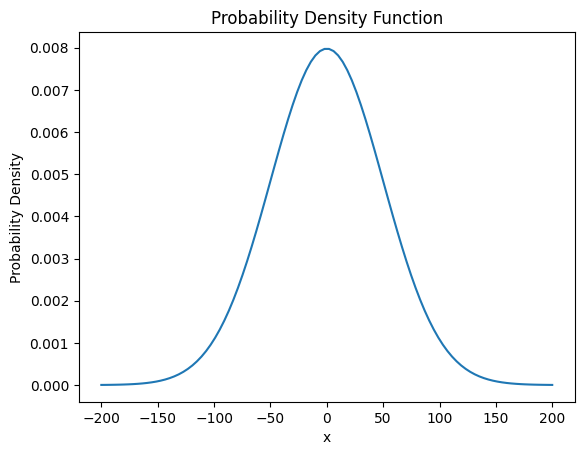

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_pdf(mean, std_dev):
    # Generate a range of x values
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)

    # Calculate the corresponding PDF values
    y = norm.pdf(x, mean, std_dev)

    # Plot the PDF
    plt.plot(x, y)
    plt.title('Probability Density Function')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.show()

# Example usage:
plot_pdf(float(input("Enter Mu_X: ")), float(input("Enter Mu_Y: ")))

## Iteration 3
The iteration 3 code presents the PDF in a two dimensional form with available parameters: `mu_x, mu_y, sigma_x, sigma_y, rho, a, b, c, d`

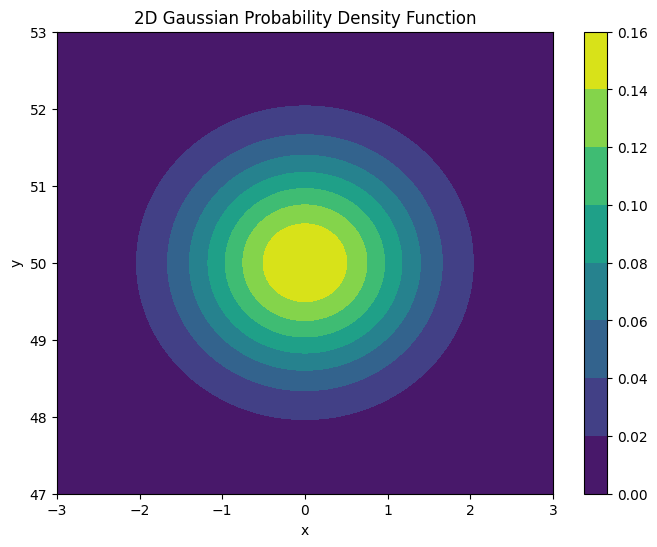

array([[1.96412803e-05, 2.35144500e-05, 2.80481778e-05, ...,
        2.80481778e-05, 2.35144500e-05, 1.96412803e-05],
       [2.35144500e-05, 2.81513908e-05, 3.35791487e-05, ...,
        3.35791487e-05, 2.81513908e-05, 2.35144500e-05],
       [2.80481778e-05, 3.35791487e-05, 4.00534111e-05, ...,
        4.00534111e-05, 3.35791487e-05, 2.80481778e-05],
       ...,
       [2.80481778e-05, 3.35791487e-05, 4.00534111e-05, ...,
        4.00534111e-05, 3.35791487e-05, 2.80481778e-05],
       [2.35144500e-05, 2.81513908e-05, 3.35791487e-05, ...,
        3.35791487e-05, 2.81513908e-05, 2.35144500e-05],
       [1.96412803e-05, 2.35144500e-05, 2.80481778e-05, ...,
        2.80481778e-05, 2.35144500e-05, 1.96412803e-05]])

In [16]:
import numpy as np
from scipy.stats import multivariate_normal

def calculate_pdf(mu_x, mu_y, sigma_x, sigma_y, rho, a, b, c, d):
    # Define the mean vector and covariance matrix
    mean = [mu_x, mu_y]
    covariance = [[sigma_x**2, rho*sigma_x*sigma_y], [rho*sigma_x*sigma_y, sigma_y**2]]

    # Create a grid of points
    x = np.linspace(mu_x + a * sigma_x, mu_x + b * sigma_x, 100)
    y = np.linspace(mu_y + c * sigma_y, mu_y + d * sigma_y, 100)
    X, Y = np.meshgrid(x, y)

    # Stack the points into a 2D array
    pos = np.dstack((X, Y))

    # Create a multivariate normal distribution
    rv = multivariate_normal(mean, covariance)

    # Calculate the PDF
    pdf = rv.pdf(pos)

    # Plot the PDF
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, pdf, cmap='viridis')
    plt.colorbar()
    plt.title('2D Gaussian Probability Density Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    return pdf

calculate_pdf(float(input("Enter Mu_X: ")), float(input("Enter Mu_Y: ")), float(input("Enter Sigma_X: ")), float(input("Enter Sigma_Y: ")), float(input("Enter Rho: ")), float(input("Enter A: ")), float(input("Enter B: ")), float(input("Enter C: ")), float(input("Enter D: ")))